<a href="https://colab.research.google.com/github/Sharika224/Automated-Detection-and-Classification-of-Gastrointestinal-Bleeding-in-Wireless-Capsule-Endoscopy/blob/main/WECBleedGen_Validation_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**WCEBleedGen Validation**











In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt

Loading data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_path = '/content/imageclassifier (1).h5'

model = load_model(model_path)

In [ ]:
!unzip drive/My\ Drive/WCEBleedGen.zip


Archive:  drive/My Drive/WCEBleedGen.zip
   creating: WCEBleedGen/bleeding/
  inflating: WCEBleedGen/bleeding/img- (1).png  
  inflating: WCEBleedGen/bleeding/img- (10).png  
  inflating: WCEBleedGen/bleeding/img- (100).png  
  inflating: WCEBleedGen/bleeding/img- (1000).png  
  inflating: WCEBleedGen/bleeding/img- (1001).png  
  inflating: WCEBleedGen/bleeding/img- (1002).png  
  inflating: WCEBleedGen/bleeding/img- (1003).png  
  inflating: WCEBleedGen/bleeding/img- (1004).png  
  inflating: WCEBleedGen/bleeding/img- (1005).png  
  inflating: WCEBleedGen/bleeding/img- (1006).png  
  inflating: WCEBleedGen/bleeding/img- (1007).png  
  inflating: WCEBleedGen/bleeding/img- (1008).png  
  inflating: WCEBleedGen/bleeding/img- (1009).png  
  inflating: WCEBleedGen/bleeding/img- (101).png  
  inflating: WCEBleedGen/bleeding/img- (1010).png  
  inflating: WCEBleedGen/bleeding/img- (1011).png  
  inflating: WCEBleedGen/bleeding/img- (1012).png  
  inflating: WCEBleedGen/bleeding/img- (1013).p

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('WCEBleedGen')

Found 2618 files belonging to 2 classes.


In [ ]:
# we cannot fetch data directly so we are using numpy iterator
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
class_labels = ["GI Bleeding", "No GI Bleeding"]
'''
0 => GI Bleeding
1 => No GI Bleeding '''

'\n0 => GI Bleeding\n1 => No GI Bleeding '

In [ ]:
#SPLIT DATA

train_size = int(len(data)*.7)
val_size = int(len(data) * .1)
test_size = int(len(data)*.2)+1

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

Evaluate Performance

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 419ms/step


In [ ]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.984674334526062, Recall:0.9809160232543945, Accuracy:0.9832713603973389


In [ ]:
f1_score = (2*pre.result().numpy()*re.result().numpy())/(pre.result().numpy()+re.result().numpy())
f1_score

0.9827915858466526

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize = (16,9))
y_pred_labels = [np.argmax(label) for label in yhat]   # we find the single level value from single image of the 10th neuron prediction value(y_pred)
cm = confusion_matrix(y, y_pred_labels)

<Figure size 1600x900 with 0 Axes>

<Axes: >

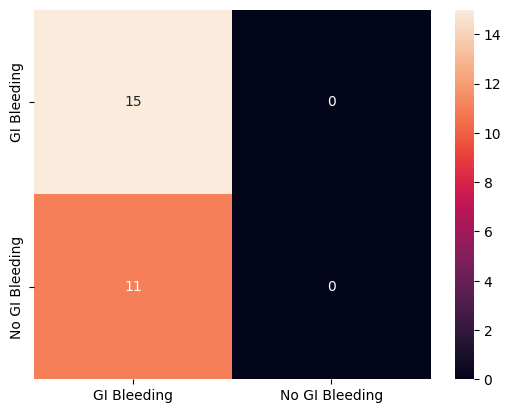

In [ ]:
# show cm
sns.heatmap(cm, annot = True, fmt = 'd', xticklabels = class_labels, yticklabels = class_labels)
# annot-value should be above box, fmt - decimel, xticklabels- label on x axis and vice versa

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Extract true labels from the test dataset
test_labels = np.concatenate([y for x, y in test], axis=0)

# Predict using the model
y_pred = model.predict(test)

# Convert probabilities to binary classes using a threshold (0.5 in this case)
y_pred_classes = (y_pred > 0.5).astype(int)

# Generate and print the classification report
print(classification_report(test_labels, y_pred_classes))


17/17 [==============================] - 14s 439ms/step
              precision    recall  f1-score   support

           0       0.50      0.51      0.51       273
           1       0.49      0.48      0.48       265

    accuracy                           0.49       538
   macro avg       0.49      0.49      0.49       538
weighted avg       0.49      0.49      0.49       538



Save the model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imagevalidator.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
